<a href="https://colab.research.google.com/github/amr9410/Data_Insight_Scolarship/blob/main/Statistical_Concepts_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libaries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Introduction

**Statistics :**  is the branch of mathematic that concerns the collection, organization, analysis, interpretation, and presentation of data.
in this article we are going to discuss some of the most common concept.
Content:
1.	Types of Analytics
2.	Population and sample
3.	Central Tendency
4.	Measure of dispersion(Variability)
5.	Relationship Between Variables
6.	Data Reshaping & Transformation 
7.	Probability
8.	Probability Distribution
9.	Hypothesis Testing and Statistical Significance
10.	Regression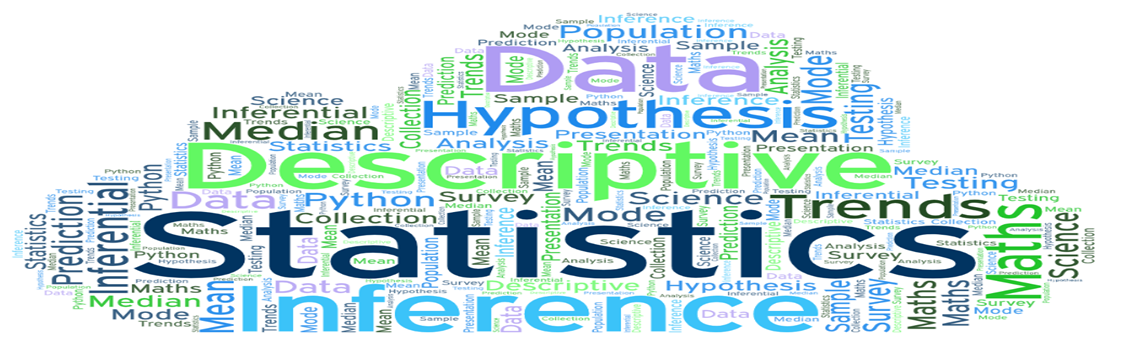


#1.	Types of Analytics



### 1.1   Descriptive Analytics 
> Descriptive analytics is the first step in data analysis. The goal of descriptive analytics is to find out ***what happened?***

### 1.2   Diagnostic Analytics 
>With diagnostic analytics, we can go one step deeper and ask the question:***Why did this happen?***	

### 1.3   Predictive Analytics 
>Predictive analytics tries to answer the question: ***What is likely to happen?***  By using what we learned with descriptive and diagnostic analytics

### 1.4   Prescriptive Analytics 
>Now that you have an idea of what is likely to happen, you might want to know what the best course of action is. Prescriptive analytics tries to answer the question: ***What should be done?*** or ***what can we do to make ... happen?***


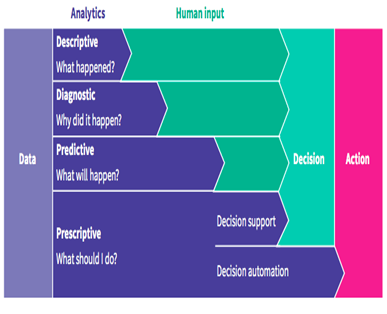
	

# 2.Population and Sample


## 2.1.	Population
is the complete collection of all individuals (scores, people,
measurements, and so on) to be studied. The collection is complete in the
sense that it includes all of the individuals to be studied.
## 2.2.	Sample
is a subcollection of members selected from a population.


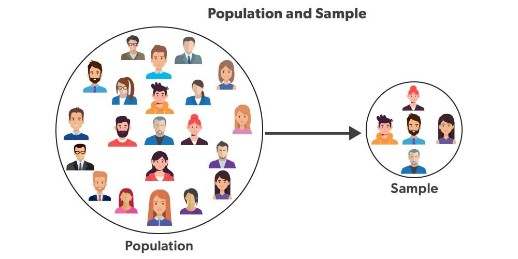





##2.3.	Sampling techniques


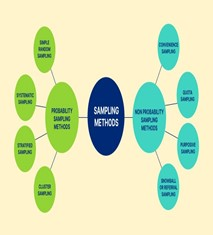
>2.3.1.	Probability Sampling


 *   Simple Random Sampling
 *   Stratified Sampling
 *   Cluster Sampling
 *  Systematic Cluster Sampling


 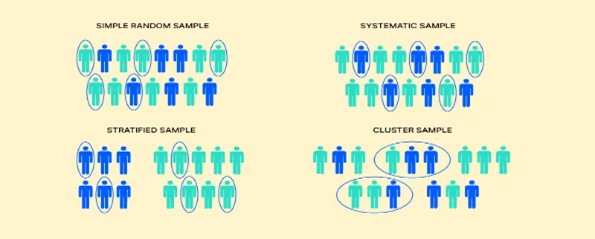

>2.3.2.	Non-Probability Sampling


 *   Convenience Sampling
 *   Purposive Sampling
 *   Quota Sampling
 *   Snowball/referral sampling
	
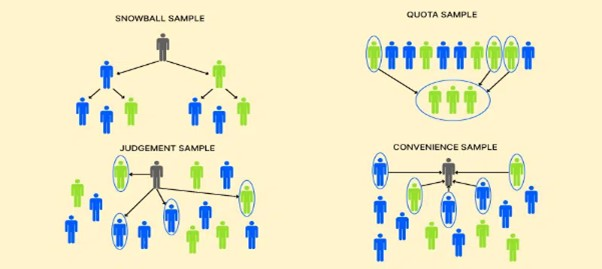

# 3.	Measure of Central Tendency



*   **Mean:** *The average value of the dataset.*

*   **Median**: *The middle value of an ordered dataset.*
*   **Mode:** *The most frequently value in the dataset. If the data have multiple values that occurred the most frequently, we have a multimodal distribution.*


*   **Skewness:** *A measure of symmetry.*

*   **Kurtosis:** *A measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.*
	
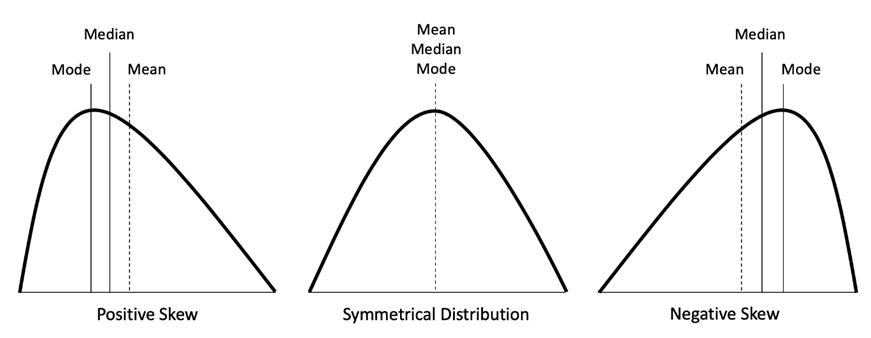


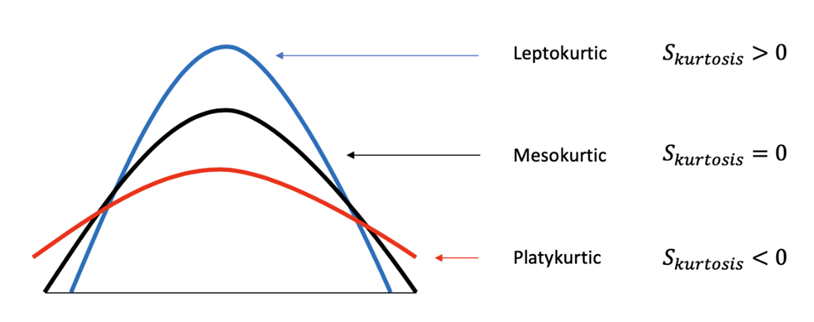


**Skewness and Kurtosis**

In [2]:
#loading dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving food_consumption.csv to food_consumption.csv
User uploaded file "food_consumption.csv" with length 52041 bytes


In [22]:
food_consumption= pd.read_csv('food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [4]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 1 to 1430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.9+ KB


In [5]:
food_consumption.describe()

,consumption,co2_emission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [6]:
food_consumption.food_category.nunique()

11

In [ ]:
print(np.quantile(total_emmission_country, [0.75, 0.9]))

[1111.1525 1494.581 ]


In [7]:
top_emmission_country = list(food_consumption.groupby('country')['co2_emission'].sum().iloc[:10 ].index)

top_emmission_country

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahamas',
 'Bangladesh',
 'Barbados']

In [ ]:
print(type(top_emmission_country))

<class 'list'>


In [8]:
food_consump_top_emission_country = food_consumption[food_consumption['country'].isin(top_emmission_country) ]
food_consump_top_emission_country

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96
...,...,...,...,...
1426,Bangladesh,dairy,21.91,31.21
1427,Bangladesh,wheat,17.47,3.33
1428,Bangladesh,rice,171.73,219.76
1429,Bangladesh,soybeans,0.61,0.27


In [20]:
row=food_consump_top_emission_country.country
column=food_consump_top_emission_country.food_category
x1=food_consump_top_emission_country.co2_emission
x2=food_consump_top_emission_country.consumption
top_country_contengency_tab = pd.crosstab(index=row,\
                                           columns= column,
                                           values=x1,
                                          aggfunc='mean',
                                          dropna=True,
                                          normalize='index')
top_country_contengency_tab

food_category,beef,dairy,eggs,fish,lamb_goat,nuts,pork,poultry,rice,soybeans,wheat
country,,,,,,,,,,,
Albania,0.390528,0.243339,0.006435,0.003459,0.301769,0.004342,0.021661,0.007993,0.005602,0.000000,0.014872
Algeria,0.244109,0.284794,0.010454,0.008434,0.380432,0.005199,0.000000,0.011259,0.005368,0.000000,0.049952
Angola,0.629119,0.042422,0.002470,0.058912,0.091576,0.009685,0.076200,0.045086,0.025158,0.000557,0.018814
Argentina,0.788068,0.127909,0.004815,0.003204,0.025147,0.000400,0.017124,0.019117,0.005165,0.000000,0.009050
Armenia,0.546584,0.268251,0.009676,0.006271,0.095285,0.004063,0.030840,0.012920,0.003667,0.000000,0.022443
Australia,0.538955,0.172289,0.004034,0.014572,0.178293,0.007969,0.044072,0.025554,0.007283,0.000046,0.006933
Austria,0.436689,0.303527,0.011138,0.016034,0.033538,0.011518,0.153605,0.016505,0.003905,0.000768,0.012773
Bahamas,0.515290,0.125090,0.004778,0.025166,0.153240,0.005977,0.097141,0.041185,0.025710,0.000034,0.006388
Bangladesh,0.105564,0.083409,0.005104,0.077102,0.124486,0.003394,0.000000,0.004009,0.587311,0.000722,0.008899


In [ ]:
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption.consumption))
print(np.median(be_consumption.consumption))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption.consumption))
print(np.median(usa_consumption.consumption))

42.132727272727266
12.59
44.650000000000006
14.58


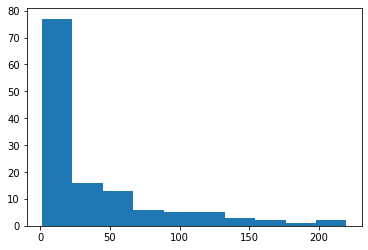

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# 4.	Measure of dispersion (Variability)



*   **Range** : *The difference between the highest and lowest value in the dataset.*

*   **Percentiles, Quartiles and Interquartile Range (IQR)**

    *   **Percentiles** : *A measure that indicates the value below which a given percentage of observations in a group of observations falls.*
    *   **Quantiles** : *Values that divide the number of data points into four more or less equal parts, or quarters.*
    *   **Interquartile Range(IQR)** : *A measure of statistical dispersion and variability based on dividing a data set into quartiles.* 
      **IQR = Q3−Q1**
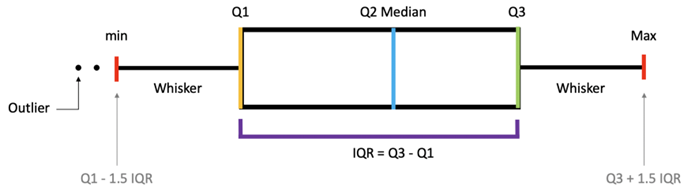
    


*   **Variance** : *The average squared difference of the values from the mean to measure how spread out a set of data is relative to mean.*

*   **Standard Deviation** : *The standard difference between each data point and the mean and the square root of variance.*

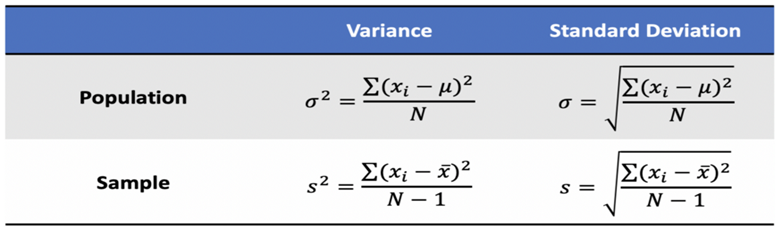
*  **Standard Error(SE)** : *An estimate of the standard deviation of the sampling distribution.*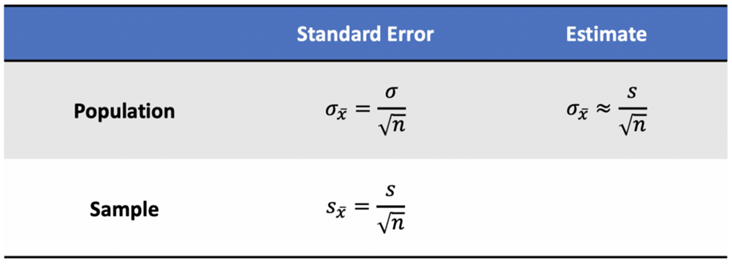



In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


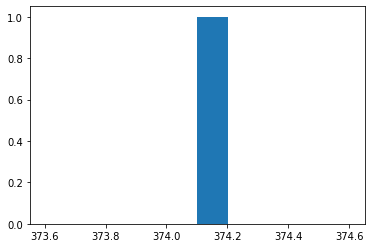

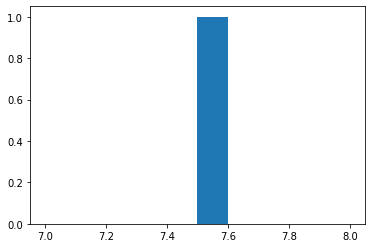

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].mean())
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].mean())
plt.show()

In [ ]:
# Compute the emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
print(iqr)

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower ) | (emissions_by_country > upper)]
print(outliers)

664.4925000000001
country
Argentina    2172.4
Name: co2_emission, dtype: float64


# 5.	Relationship Between Variables



*   **Causality**  :  *Relationship between two events where one event is affected by the other.*

*   **Covariance**  :  *A quantitative measure of the joint variability between two or more variables.*
*   **Correlation** :  *Measure the relationship between two variables and ranges from -1 to 1, the normalized version of covariance.*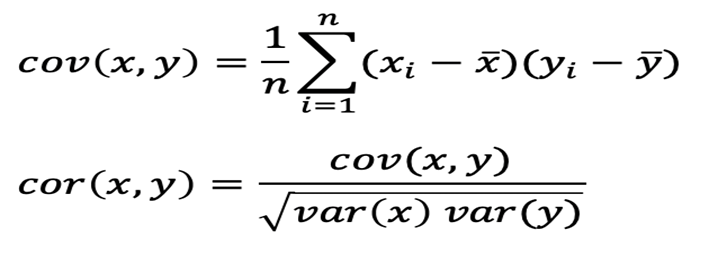    
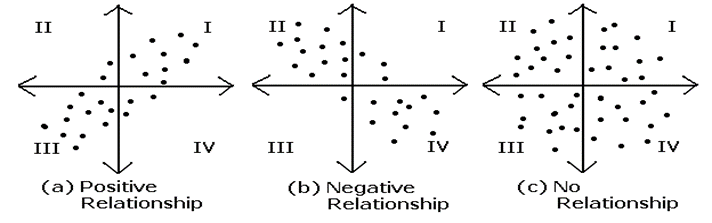





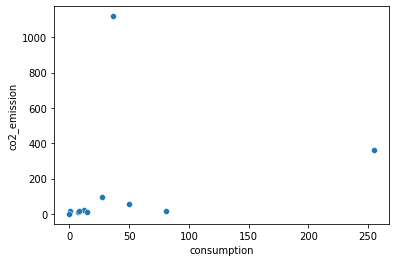

0.25593679507588407


In [ ]:
# Scatterplot of food consumption and co2 emission for USA
sns.scatterplot(x='consumption', y='co2_emission', data=usa_consumption)

# Show plot
plt.show()
  
# Correlation between food consumption and co2 emission for USA
cor = usa_consumption.consumption.corr(usa_consumption.co2_emission)

print(cor)

# 6.	Probability

**Probability**  *is the branch of mathematics concerning numerical descriptions of how likely an event is to occur.*


*   **Complement**  : P(A)+P(A’) =1




*   **Intersection** :  P(A∩B)=P(A)P(B)
*  **Union** : P(A∪B)=P(A)+P(B)−P(A∩B)  
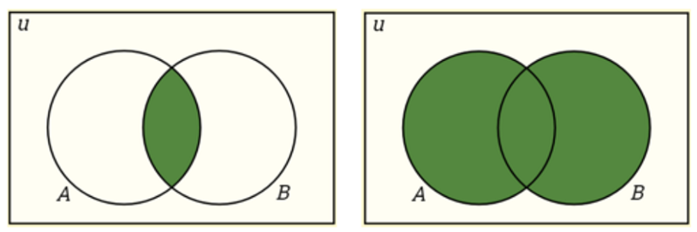


*   **Conditional Probability** : P(A|B) is a measure of the probability of one event occurring with some relationship to one       or more other events. P(A|B)=P(A∩B)/P(B), when P(B)>0.


*   **Independent Events** : Two events are independent if the occurrence of one does not affect the probability of occurrence of the other. P(A∩B)=P(A)P(B) where P(A) != 0 and P(B) != 0 , P(A|B)=P(A), P(B|A)=P(B) 
*   **Mutually Exclusive Events** : Two events are mutually exclusive if they cannot both occur at the same time. P(A∩B)=0 and P(A∪B)=P(A)+P(B).

1.   **Bayes’ Theorem**  describes the probability of an event based on prior knowledge of conditions that might be related to the event.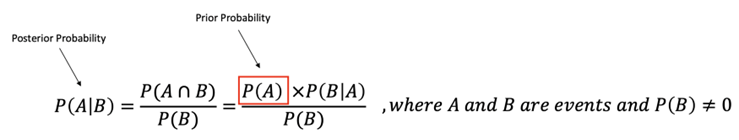






# 7.	Probability Distribution

# 7.1.	Probability Distribution Functions



*   **Probability Mass Function(PMF)** : *A function that gives the probability that a discrete random variable is exactly equal to some value.*

*   **Probability Density Function(PDF)** : *A function for continuous data where the value at any given sample can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample.*
*  **Cumulative Density Function(CDF)** : *A function that gives the probability that a random variable is less than or equal to a certain value.*

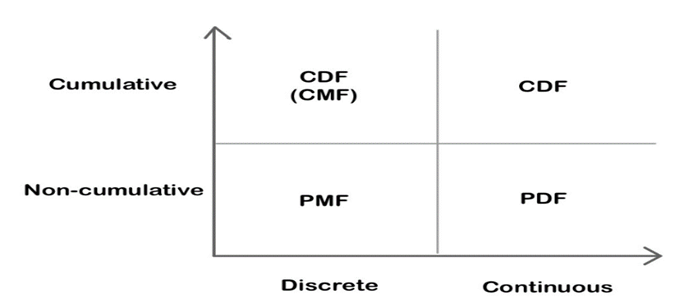




#7.2.	Continuous Probability Distribution



* **Uniform Distribution**: Also called a rectangular distribution, is a probability distribution where all outcomes are equally likely.

*   **Normal/Gaussian Distribution** : *The curve of the distribution is bell-shaped and symmetrical and is related to the Central Limit Theorem that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.*
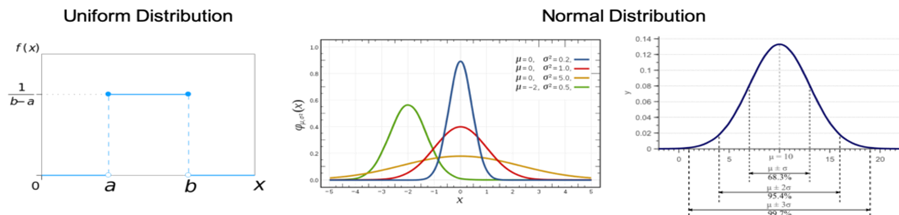
*   **Exponential Distribution** : *A probability distribution of the time between the events in a Poisson point process.*

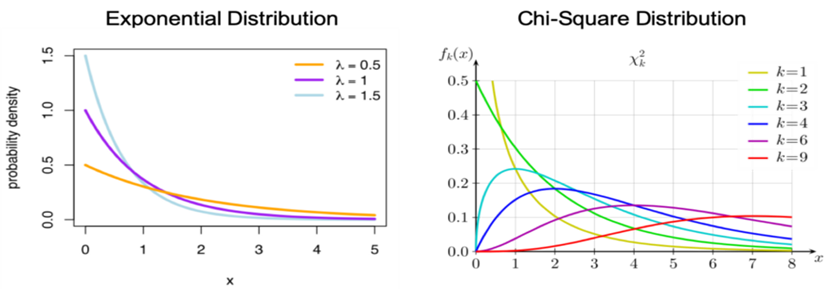
*   **Chi-Square Distribution** : *The distribution of the sum of squared standard normal deviates.*



# 7.3.	Discrete Probability Distribution



*  **Bernoulli Distribution** : *The distribution of a random variable which takes a single trial and only 2 possible outcomes, namely 1(success) with probability p, and 0(failure) with probability (1-p).*

*  **Binomial Distribution** : *The distribution of the number of successes in a sequence of n independent experiments, and each with only 2 possible outcomes, namely 1(success) with probability p, and 0(failure) with probability (1-p).*
*  **Poisson Distribution** : *The distribution that expresses the probability of a given number of events k occurring in a fixed interval of time if these events occur with a known constant average rate λ and independently of the time*

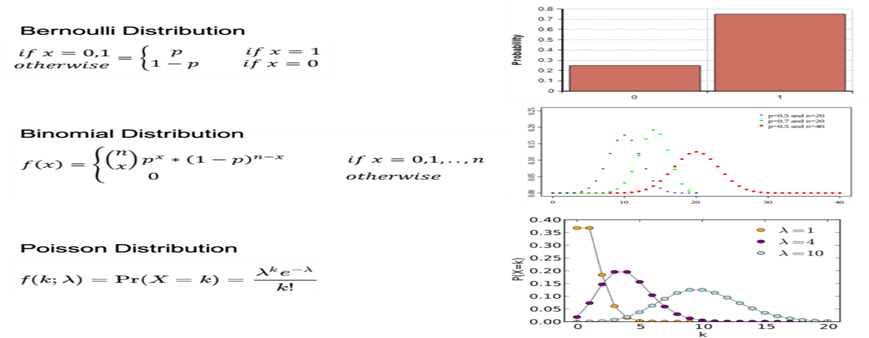




# 8.	Data Reshaping & Transformation 

**Data Transformation :**  is the application of a deterministic mathematical function to each point in a data set—that is, each data point zi is replaced with the transformed value yi = f(zi), where f is a function. Transforms are usually applied so that the data appear to more closely meet the assumptions of a statistical inference procedure that is to be applied, or to improve the interpretability or appearance of graphs.

**Types of transformation.**

1.   Logarithmic Transformation

2.  Cube Root Transformation
3.   Square Root Transformation

4.   Square Transformation

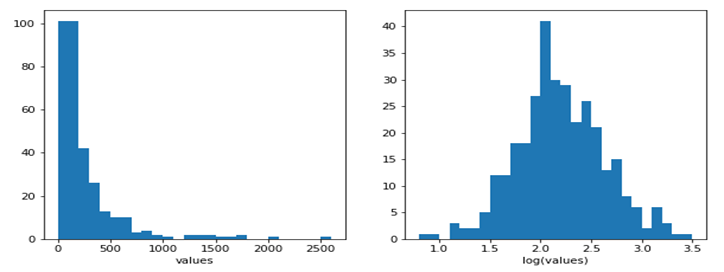

# 9.	Hypothesis Testing and Statistical Significance

**Null and Alternative Hypothesis**
 

*  **Null Hypothesis** :* A general statement that there is no relationship between two measured phenomena or no association among groups.*

*  **Alternative Hypothesis** : *Be contrary to the null hypothesis.*
*  In statistical hypothesis testing, a 

   *   **type I error**  is the rejection of a true null hypothesis
   *   **type II error** is the non-rejection of a false null hypothesis. 


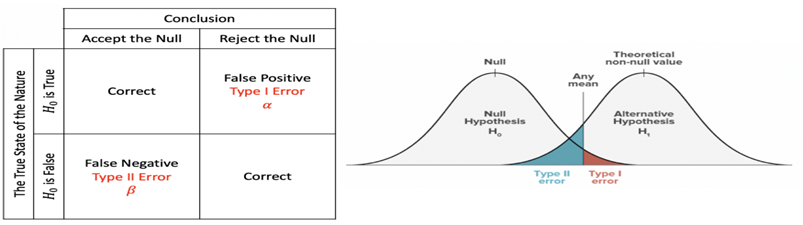

 




 
   



**Interpretation**
*  **P-value**  : *The probability of the test statistic being at least as extreme as the one observed given that the null hypothesis is true. When p-value > α, we fail to reject the null hypothesis, while p-value ≤ α, we reject the null hypothesis and we can conclude that we have the significant result.*

*   **Critical Value** : *A point on the scale of the test statistic beyond which we reject the null hypothesis, and, is derived from the level of significance α of the test. It depends upon a test statistic, which is specific to the type of test, and the significance level, α, which defines the sensitivity of the test.*

*   **Significance Level and Rejection Region** : *The rejection region is actually depended on the significance level. The significance level is denoted by α and is the probability of rejecting the null hypothesis if it is true.*

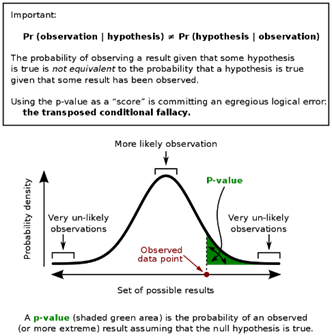


**Z-Test**

*A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution and tests the mean of a distribution in which we already know the population variance. Therefore, many statistical tests can be conveniently performed as approximate Z-tests if the sample size is large or the population variance is known.*

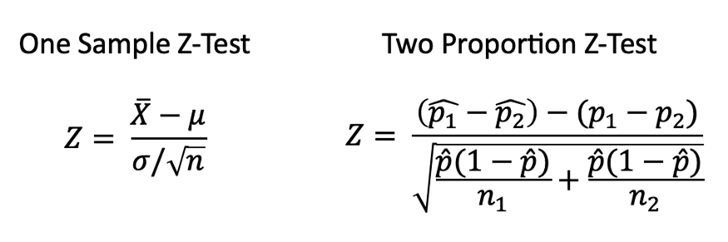

**T-Test**

*A T-test is the statistical test if the population variance is unknown and the sample size is not large (n < 30).
Paired sample means that we collect data twice from the same group, person, item or thing. 
Independent sample implies that the two samples must have come from two completely different populations.*

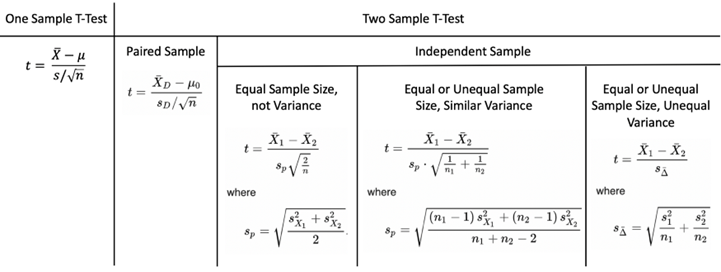 


**ANOVA(Analysis of Variance)**

*ANOVA is the way to find out if experiment results are significant. One-way ANOVA compare two means from tow independent group using only one independent variable. Two-way ANOVA is the extension of one-way ANOVA using two independent variables to calculate main effect and interaction effect.*

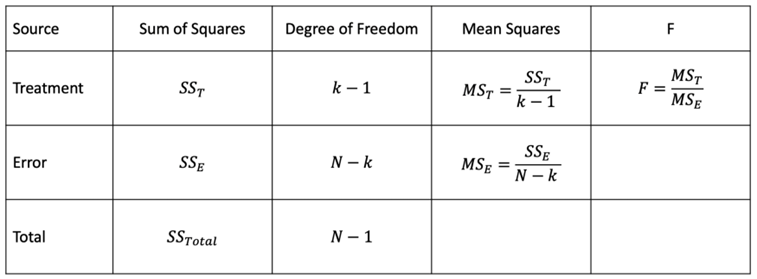


**Chi-Square Test**

*  Chi-Square Test check whether or not a model follows approximately normality when we have s discrete set of data points. 
*  Goodness of Fit Test determine if a sample matches the population fit one categorical variable to a distribution. 
*  Chi-Square Test for Independence compare two sets of data to see if there is a relationship.*

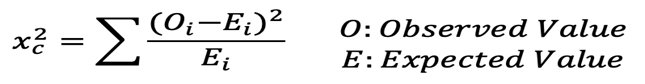 

# 10.	Regression

**Linear Regression :** is a linear approach to modeling the relationship between a ***dependent variable*** (the variable being measured in a scientific experiment ) and one ***independent variable***(the variable that is controlled in a scientific experiment to test the effects on the dependent variable). 

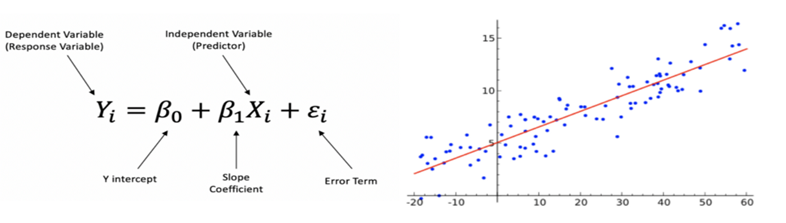





**Multiple Linear Regression** is a linear approach to modeling the relationship between ***a dependent variable*** and two or more ***independent variables***.

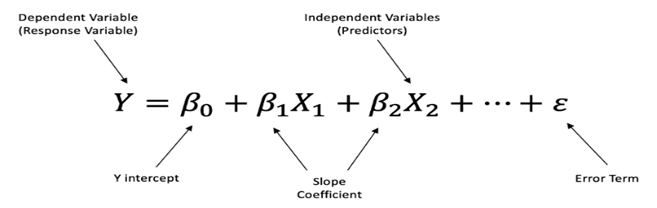



**Assumptions of Linear Regression**
*	Linear Relationship
*	Multivariate Normality
*	No or Little Multicollinearity
*	No or Little Autocorrelation
*	Homoscedasticity
